In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
# The path can also be read from a config file, etc.
OPENSLIDE_PATH = r'C:\tools\openslide-win64-20221217\bin'

import os
if hasattr(os, 'add_dll_directory'):
    # Python >= 3.8 on Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide
    
# import large_image

from openslide import open_slide
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_image_scale(wsi, h_c, w_c, h, w):
    h_0 = h_c - h//2
    w_0 = w_c - w//2

    location = (w_0, h_0)
    smaller_region = slide.read_region(location, level=0, size=(h,w))
    smaller_region = np.array(smaller_region.convert('RGB'))
    
    return cv2.resize(smaller_region, (224, 224)).astype(np.float32) / 255.

In [4]:
wsi_path = r"C:\Users\penki\Documents\cmc\data\PATH-DT-MSU-WSI\WSS2-v1\train\03.svs"
slide = open_slide(wsi_path)

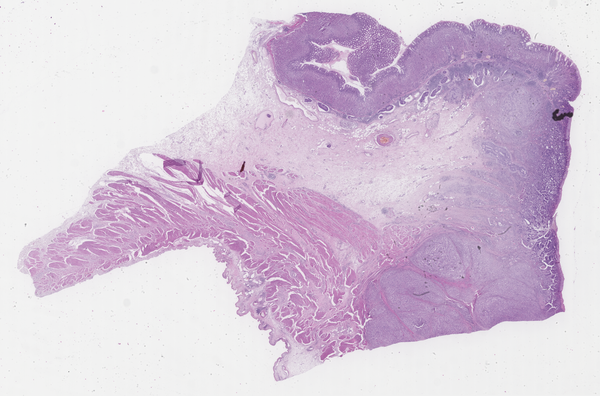

In [5]:
slide_thimb_600 = slide.get_thumbnail(size=(600,600))
slide_thimb_600

In [6]:
slide.level_dimensions

((99600, 65809), (24900, 16452), (6225, 4113), (3112, 2056))

In [4]:
slide_annotated = cv2.imread(r"C:\Users\penki\Documents\cmc\data\PATH-DT-MSU-WSI\WSS2-v1\train\03_preview.jpg")
slide_annotated = cv2.cvtColor(slide_annotated, cv2.COLOR_BGR2RGB)

In [5]:
slide_annotated.shape

(2973, 4500, 3)

In [6]:
h, w = slide_annotated.shape[:2]

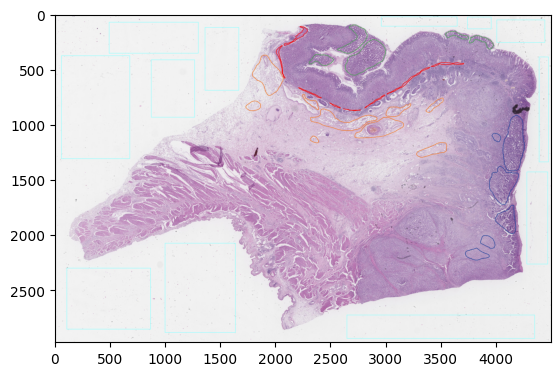

In [7]:
plt.imshow(slide_annotated)

In [8]:
DEF_COLOR_MAP = {
    "AT": (245, 119, 34), # AT (orange)
    "BG": (153, 255, 255), # BG (cyan)
    "LP": (64, 170, 72), # LP (green)
    "MM": (255, 0, 0), # MM (red)
    "TUM": (33, 67, 156), # TUM (blue)
}

FOLDER_TO_LABEL = {
    "AT": 0,
    "BG": 1,
    "LP": 2,
    "MM": 3,
    "TUM": 4
}

In [9]:
import json
 
with open(r"C:\Users\penki\Documents\cmc\data\PATH-DT-MSU-WSI\WSS2-v1\train\03_anno.json") as json_file:
    annotation = json.load(json_file)

In [10]:
gt = np.zeros(shape=(h,w,3), dtype=np.uint8)
for an in annotation:
    cl, cc = an["class"], an["vertices"]
    
    cc = np.array(cc) / 22.13
    cc = cc.astype(np.int32)
    cv2.fillPoly(gt,
                 pts=[cc],
                 color=DEF_COLOR_MAP[cl])

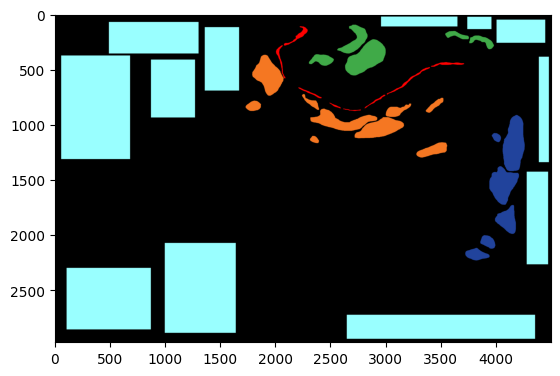

In [11]:
plt.imshow(gt)

In [31]:
labeled = cv2.imread(r"C:\Users\penki\Documents\cmc\PathScribe\output\exp_176\03_x40.jpg")
labeled = cv2.cvtColor(labeled, cv2.COLOR_BGR2RGB)

In [32]:
labeled.shape

(5946, 9000, 3)

In [35]:
gt.shape

(5946, 9000, 3)

In [34]:
# приведение к одинаковому размеру

gt = cv2.resize(gt, (w*2,h*2), cv2.INTER_NEAREST)

In [36]:
iou = {
    "AT": 0.0,
    "BG": 0.0,
    "LP": 0.0,
    "MM": 0.0,
    "TUM": 0.0
}

for cl, cc in DEF_COLOR_MAP.items():
    gt_curr = np.where(gt==cc, (255, 255, 255), (0,0,0)).mean(-1).astype('bool')
    labeled_curr = np.where(labeled==cc, (255, 255, 255), (0,0,0)).mean(-1).astype('bool')
    
    intersection = np.logical_and(gt_curr, labeled_curr)
    
    iou[cl] = intersection.astype(np.float32).sum() / gt_curr.astype(np.float32).sum() * 100.0

In [86]:
iou_x20 = {'AT': 84.4281017780304,
 'BG': 99.58807229995728,
 'LP': 82.41018056869507,
 'MM': 15.746474266052246,
 'TUM': 98.04382920265198}

In [87]:
sum(list(iou_x20.values())) / 5.0

76.04333162307739

In [88]:
iou_x10 = {'AT': 87.80332803726196,
 'BG': 99.84723329544067,
 'LP': 61.74054145812988,
 'MM': 17.4723818898201,
 'TUM': 98.19108843803406}

In [89]:
sum(list(iou_x10.values())) / 5.0

73.01091462373734

In [38]:
iou_x40 = {'AT': 78.85206937789917,
 'BG': 99.46545958518982,
 'LP': 15.016180276870728,
 'MM': 7.351355254650116,
 'TUM': 94.52110528945923}

In [39]:
sum(list(iou_x40.values())) / 5.0

59.04123395681381

In [89]:
gt_curr = np.where(gt==(245, 119, 34), (255, 255, 255), (0,0,0)).mean(-1).astype('bool')
labeled_curr = np.where(labeled==(245, 119, 34), (255, 255, 255), (0,0,0)).mean(-1).astype('bool')

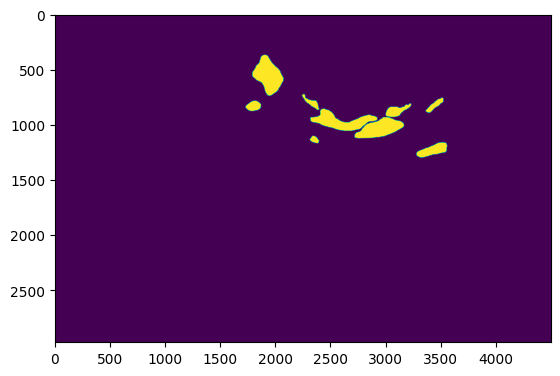

In [90]:
plt.imshow(gt_curr)

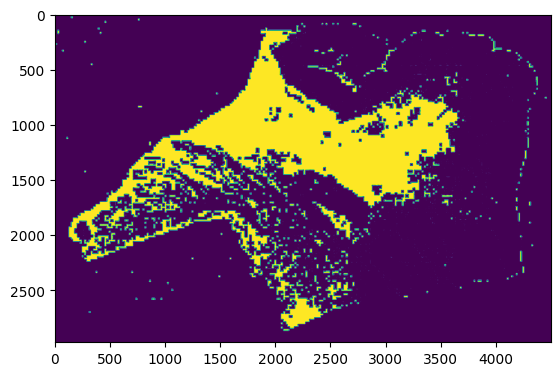

In [91]:
plt.imshow(labeled_curr)

In [92]:
intersection = np.logical_and(gt_curr, labeled_curr)

In [93]:
intersection.astype(np.float32).sum()

198413.0

In [94]:
gt_curr.astype(np.float32).sum()

230916.0

In [95]:
198413.0 / 230916.0 * 100

85.92431879990993